# To start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import networkx as nx
from collections import Counter

giocatori = pd.read_csv("data/df_players.csv", encoding='latin-1')
giocatori = giocatori.drop(["Unnamed: 0"], axis = 1)

In [2]:
giocatori.head()

,Player_Names,Player_valuation,Age,Height,Position,Foot,Y_Contract_Left,Actual_Club,Data_League,Goals,...,Crosses.1,Interceptions.1,Tackles.Won.1,Penalty.Kicks.Won,Penalty.Kicks.Conceded,Own.Goals,Ball.Recoveries,Aerials.won,Aerials.lost,X..of.Aerials.Won
0,Aaron Connolly,7000000,22,1.75,Centre-Forward,right,0.243836,Middlesbrough FC,Premier League,0.23,...,0.23,0.00,0.57,0.11,0.00,0.0,3.19,1.25,3.41,26.8
1,Aaron Cresswell,4000000,32,1.70,Left-Back,left,1.326027,West Ham United,Premier League,0.03,...,2.38,1.46,0.57,0.00,0.03,0.0,7.94,1.22,0.77,61.2
2,Aaron Hickey,13000000,19,1.85,Left-Back,both,2.328767,Bologna FC 1909,Serie A,0.19,...,1.30,1.21,0.63,0.00,0.00,0.0,6.08,0.48,1.06,31.3
3,Aaron Lennon,1000000,34,1.65,Right Winger,right,0.326027,Burnley FC,Premier League,0.18,...,1.74,0.64,1.10,0.00,0.00,0.0,4.85,0.73,1.19,38.1
4,Aaron Leya Iseka,2200000,24,1.82,Centre-Forward,right,3.328767,Barnsley FC,Ligue 1,0.36,...,0.36,0.18,0.45,0.00,0.00,0.0,2.77,2.41,4.20,36.5


# Leagues Comparison

In [9]:
data_partite = pd.read_csv("data/data_matches.csv", encoding='latin-1')
campionati = pd.read_csv("data/leagues.csv", encoding='latin-1')

In [15]:
def transformation(dataset, column, retain, new_col_names):
    new_data = dataset.merge(campionati, left_on= column, right_on = "Squad", how='outer').fillna(0)
    new_data = new_data[(new_data['League'] != 0) & (new_data[column] != 0)]
    new_data = new_data[retain]
    new_data.columns = new_col_names
    new_data['DR'] = new_data['DR'].apply(lambda x: int(x))
    new_data = new_data.reset_index()
    new_data = new_data.drop(['index'],axis = 1)
    return new_data

df3 = transformation(data_partite, 'Home_Team', ["League","Away_Team","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df4 = transformation(df3, "Away_Team", ["Home_Team","League","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df5 = transformation(df4, "Winner", ["Home_Team","Away_Team","League","DR"], ['Home_League',"Away_League","Winner","DR"])

df5 = df5[df5["Home_League"] != df5["Away_League"]]

In [16]:
list1 = [i for i in df6['Home_League']]
list2 = [i for i in df6['Away_League']]
list3 = list1+list2
Counter(list3).most_common()

[('La Liga', 677),
 ('Premier League', 621),
 ('Bundesliga', 576),
 ('Serie A', 494),
 ('Ligue 1', 440),
 ('Greece League', 388),
 ('Liga Portuguesa', 386),
 ('Russian League', 362),
 ('Eredivisie', 290),
 ('Belgian League', 274),
 ('Turkish League', 252),
 ('Ukraine League', 244),
 ('Swiss Super League', 237),
 ('Austrian Bundesliga', 227),
 ('Czech League', 186),
 ('HNL 1', 156),
 ('Denmark League', 155),
 ('Norway League', 112),
 ('Belarus League', 104),
 ('Bulgarian League', 102),
 ('Slovak League', 99),
 ('Ekstraklasa', 96),
 ('Serbian League', 96),
 ('Sweden League', 93),
 ('Cypro League', 87),
 ('Romanian League', 83),
 ('Israeli Ligue', 62),
 ('Premyer Liqasi', 44),
 ('Hungary League', 38),
 ('Luxembourg League', 36),
 ('Kazaki League', 29),
 ('Divizia Nasional', 28),
 ('Albanian League', 22),
 ("Ligat ha'Al", 20),
 ('Finland League', 19),
 ('Welsh League', 18),
 ('Bosnia Premijer Liga', 10),
 ('Erovnuli Liga', 9)]

In [17]:
df_a = pd.DataFrame(index = df5.Home_League.unique(),columns = df5.Home_League.unique())
df_a = df_a.fillna(0)

nazioni = df5.Home_League.unique()

for i in range(len(df5)):
    a = Counter(df5.iloc[i][:3].values)
    rev = {v: k for k, v in a.items()}
    loser = rev[1]
    df_a[df5.iloc[i]['Winner']][loser] += df5.iloc[i][3]
    
v = pd.DataFrame(columns = ['perdente',"vincente","di quanto"])
for k in range(len(df_a)):
    for j in range(len(df_a)):
        v = v.append({'perdente': df_a.columns[k],'vincente': df_a[df_a.columns[k]].index[j],'di quanto':df_a[df_a.columns[k]][j]}, ignore_index = True)

v = v[v['vincente'] != v['perdente']]

In [18]:
a = list(set([i for i in v['vincente']]))
b = list(set([i for i in v['perdente']]))
c = list(set(a+b))
subset = v[['vincente', 'perdente','di quanto']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples = [x for x in tuples if x[2] != 0] 

G = nx.DiGraph()
G.add_nodes_from(c)
G.add_weighted_edges_from(tuples)
G.edges(data=True)

OutEdgeDataView([('Serbian League', 'Ligue 1', {'weight': 16}), ('Serbian League', 'Premier League', {'weight': 19}), ('Serbian League', 'Cypro League', {'weight': 2}), ('Serbian League', 'Serie A', {'weight': 5}), ('Serbian League', 'Bundesliga', {'weight': 2}), ('Serbian League', 'Ukraine League', {'weight': 17}), ('Serbian League', 'Czech League', {'weight': 7}), ('Serbian League', 'Turkish League', {'weight': 11}), ('Serbian League', 'Belgian League', {'weight': 5}), ('Serbian League', 'Bulgarian League', {'weight': 4}), ('Serbian League', 'Liga Portuguesa', {'weight': 3}), ('Serbian League', 'La Liga', {'weight': 6}), ('Serbian League', 'Russian League', {'weight': 6}), ('Serbian League', 'Greece League', {'weight': 4}), ('Serbian League', 'Erovnuli Liga', {'weight': 2}), ('Serbian League', 'Belarus League', {'weight': 1}), ('Serbian League', 'Slovak League', {'weight': 1}), ('Bundesliga', 'Swiss Super League', {'weight': 11}), ('Bundesliga', 'Ligue 1', {'weight': 34}), ('Bundesli

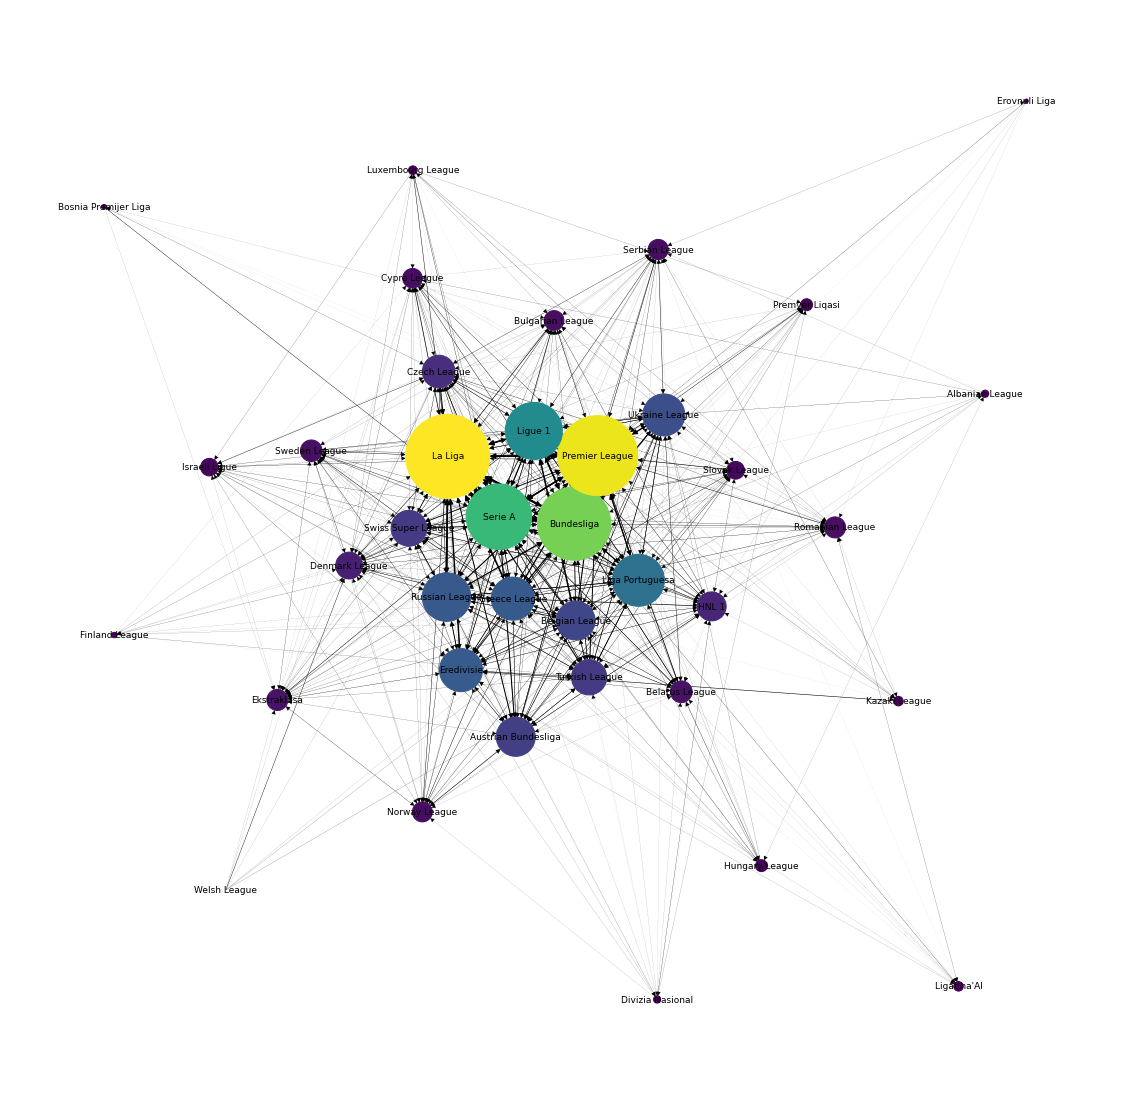

In [21]:
pos = nx.spring_layout(G)

node_size = [7.5 * G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
node_color = [50 * G.in_degree(i) * sum([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
weights = [G[i][j]['weight'] * 0.025 for i,j in G.edges()]

plt.figure(figsize = (20,20))
           
nx.draw_networkx(G, 
                 pos,
                 with_labels = False,
                 node_color = node_color,
                 node_size = node_size, 
                 width = weights)

nx.draw_networkx_labels(G, pos = pos, font_color = "black", font_size = 9)

plt.box(on = None)
plt.axis('off')

plt.show()

In [26]:
lista_j = [[i, G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))])] for i in G]
lista_j = [j for j in lista_j if ~np.isnan(j[1])]

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X = [G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
X = [j for j in X if ~np.isnan(j)]
X.append(0)

scaled_x = NormalizeData(X)
#scaled_x = np.delete(scaled_x, len(scaled_x)-1)

y = [[lista_j[i][0], scaled_x[i]] for i in range(len(lista_j))]

diz={}

for i in range(len(y)):
    diz[y[i][0]] = y[i][1]
    
diz = {k: v for k, v in sorted(diz.items(), key=lambda item: item[1], reverse=True)}
diz

{'La Liga': 1.0,
 'Premier League': 0.90552016985138,
 'Bundesliga': 0.7632696390658174,
 'Serie A': 0.60828025477707,
 'Ligue 1': 0.4617834394904458,
 'Liga Portuguesa': 0.38216560509554137,
 'Russian League': 0.3343949044585987,
 'Eredivisie': 0.2632696390658174,
 'Greece League': 0.26220806794055196,
 'Ukraine League': 0.24946921443736728,
 'Austrian Bundesliga': 0.21549893842887471,
 'Belgian League': 0.21337579617834393,
 'Swiss Super League': 0.18152866242038215,
 'Turkish League': 0.1762208067940552,
 'Czech League': 0.14968152866242038,
 'HNL 1': 0.11889596602972398,
 'Denmark League': 0.1019108280254777,
 'Belarus League': 0.06687898089171973,
 'Sweden League': 0.06581740976645434,
 'Romanian League': 0.06263269639065816,
 'Ekstraklasa': 0.06263269639065816,
 'Serbian League': 0.057324840764331204,
 'Norway League': 0.05626326963906581,
 'Bulgarian League': 0.05520169851380042,
 'Cypro League': 0.05414012738853503,
 'Slovak League': 0.044585987261146494,
 'Israeli Ligue': 0.04